In [1569]:
# import relevant libraries
import pandas as pd
import numpy as np

In [1570]:
# load the csvs
df1 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df1.csv')
df2 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df2.csv')
df3 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df3.csv')
df4 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df4.csv')
df5 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df5.csv')
df6 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df6.csv')
df7 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df7.csv')
df8 = pd.read_csv('../ScrapeData/csv_recipes/recipe_df8.csv')

In [1571]:
# concat the dataframes
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
df = df.drop(['Unnamed: 0', 'id'], axis=1) #drop columns not required

In [1572]:
df.count()

bestrating          11512
imagesrc             5670
ingredients         11524
makeitagainscore    11512
preparation         11522
rating              11512
reviews             11512
tags                11495
title               11523
dtype: int64

In [1573]:
# reset index
df = df.reset_index(drop=True)

In [1574]:
df.head(3)

,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title
0,4.0,https://assets.epicurious.com/photos/56df1d8cb...,"['2 cups whole-wheat flour', '2 cups all-purpo...",90%,Put oven rack in middle position and preheat o...,3.5,50.0,"['Irish', 'Bread', 'Bake', 'Vegetarian', 'Quic...",Irish Brown Bread
1,4.0,https://assets.epicurious.com/photos/5a78b5919...,"['1 Tbsp. crushed red pepper flakes', '1 Tbsp....",91%,"Coarsely grind red pepper flakes, peppercorns,...",3.0,11.0,"['Pepper', 'Fennel', 'Pork', 'Garlic', 'White ...",Slow-Cooked Pork with Chickpeas
2,4.0,https://assets.epicurious.com/photos/5a68f33b3...,"['1/4 cup extra-virgin olive oil', '12 oz. dry...",67%,Pour oil into cooker insert and select “Sauté....,2.0,15.0,"['Instant Pot', 'Kale', 'Potato', 'Onion', 'Ga...",Instant Pot Caldo Verde


In [1575]:
# drop rows if there are null value records
df.dropna(axis=0, how='any', inplace=True,subset=['bestrating','ingredients',\
                            'makeitagainscore','preparation','rating','reviews','tags','title'])

#### Create a column for tags

In [1576]:
df['tags_clean'] = ""

In [1577]:
# ast - Abstract Syntax Tree - processes trees of the Python abstract syntax grammar.
import ast

for index, row in df.iterrows():
    all_tags = []
    tags = ast.literal_eval(row["tags"])
    for tag in tags:
        all_tags.append(tag)
    all_tags_str = ','.join(all_tags)
    df.set_value(index,'tags_clean',all_tags_str)  

In [1578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11494 entries, 0 to 11523
Data columns (total 10 columns):
bestrating          11494 non-null float64
imagesrc            5644 non-null object
ingredients         11494 non-null object
makeitagainscore    11494 non-null object
preparation         11494 non-null object
rating              11494 non-null float64
reviews             11494 non-null float64
tags                11494 non-null object
title               11494 non-null object
tags_clean          11494 non-null object
dtypes: float64(3), object(7)
memory usage: 1.3+ MB


#### Create a class for ratings

In [1579]:
df['rating'].value_counts()

3.5    6452
3.0    2955
4.0    1432
2.5     560
2.0      71
1.5      18
1.0       5
0.0       1
Name: rating, dtype: int64

In [1580]:
def classify_rating(rating):
    if rating == 4:
        return 'exceptional'
    
    elif rating == 3.5:
        return 'good'
    
    elif rating == 3:
        return 'average'
    
    else:
        return 'negative'

In [1581]:
df['rating_class'] = df['rating'].apply(classify_rating)

In [1582]:
#class distribution
df['rating_class'].value_counts()

good           6452
average        2955
exceptional    1432
negative        655
Name: rating_class, dtype: int64

### EDA

#### Relationship between image availability and rating

In [1583]:
# create has_image feature
df['imagesrc_class'] = np.where(df['imagesrc'].isnull(), 0, 1)

In [1584]:
df.groupby(['rating_class']).agg({'imagesrc_class':np.mean})

,imagesrc_class
rating_class,
average,0.392217
exceptional,0.690642
good,0.500620
negative,0.406107


#### Relationship between nu of ingredients and rating

In [1585]:
df["ingredients_elements"] = np.nan

In [1586]:
for index, row in df.iterrows():
    elements = row["ingredients"].count(',')
    df.set_value(index, "ingredients_elements", elements)

In [1587]:
df.head(2)

,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title,tags_clean,rating_class,imagesrc_class,ingredients_elements
0,4.0,https://assets.epicurious.com/photos/56df1d8cb...,"['2 cups whole-wheat flour', '2 cups all-purpo...",90%,Put oven rack in middle position and preheat o...,3.5,50.0,"['Irish', 'Bread', 'Bake', 'Vegetarian', 'Quic...",Irish Brown Bread,"Irish,Bread,Bake,Vegetarian,Quick & Easy,St. P...",good,1,9.0
1,4.0,https://assets.epicurious.com/photos/5a78b5919...,"['1 Tbsp. crushed red pepper flakes', '1 Tbsp....",91%,"Coarsely grind red pepper flakes, peppercorns,...",3.0,11.0,"['Pepper', 'Fennel', 'Pork', 'Garlic', 'White ...",Slow-Cooked Pork with Chickpeas,"Pepper,Fennel,Pork,Garlic,White Wine,Onion,Chi...",average,1,18.0


In [1588]:
df.groupby(['rating_class']).agg({'ingredients_elements':np.mean})

,ingredients_elements
rating_class,
average,12.653469
exceptional,14.178771
good,13.502945
negative,11.522137


#### Relationship between nu of tags and rating

In [1589]:
df["tags_elements"] = np.nan

In [1590]:
for index, row in df.iterrows():
    elements = row["tags"].count(',')
    df.set_value(index, "tags_elements", elements)

In [1591]:
df.head(2)

,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title,tags_clean,rating_class,imagesrc_class,ingredients_elements,tags_elements
0,4.0,https://assets.epicurious.com/photos/56df1d8cb...,"['2 cups whole-wheat flour', '2 cups all-purpo...",90%,Put oven rack in middle position and preheat o...,3.5,50.0,"['Irish', 'Bread', 'Bake', 'Vegetarian', 'Quic...",Irish Brown Bread,"Irish,Bread,Bake,Vegetarian,Quick & Easy,St. P...",good,1,9.0,7.0
1,4.0,https://assets.epicurious.com/photos/5a78b5919...,"['1 Tbsp. crushed red pepper flakes', '1 Tbsp....",91%,"Coarsely grind red pepper flakes, peppercorns,...",3.0,11.0,"['Pepper', 'Fennel', 'Pork', 'Garlic', 'White ...",Slow-Cooked Pork with Chickpeas,"Pepper,Fennel,Pork,Garlic,White Wine,Onion,Chi...",average,1,18.0,11.0


In [1592]:
df.groupby(['rating_class']).agg({'tags_elements':np.mean})

,tags_elements
rating_class,
average,12.298139
exceptional,13.058659
good,12.785958
negative,12.181679


#### Relationship between makeitagainscore  and rating

In [1593]:
df['makeitagainscore'] = pd.to_numeric(df['makeitagainscore'].str.replace('%', ''))

In [1594]:
df.head(2)

,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title,tags_clean,rating_class,imagesrc_class,ingredients_elements,tags_elements
0,4.0,https://assets.epicurious.com/photos/56df1d8cb...,"['2 cups whole-wheat flour', '2 cups all-purpo...",90,Put oven rack in middle position and preheat o...,3.5,50.0,"['Irish', 'Bread', 'Bake', 'Vegetarian', 'Quic...",Irish Brown Bread,"Irish,Bread,Bake,Vegetarian,Quick & Easy,St. P...",good,1,9.0,7.0
1,4.0,https://assets.epicurious.com/photos/5a78b5919...,"['1 Tbsp. crushed red pepper flakes', '1 Tbsp....",91,"Coarsely grind red pepper flakes, peppercorns,...",3.0,11.0,"['Pepper', 'Fennel', 'Pork', 'Garlic', 'White ...",Slow-Cooked Pork with Chickpeas,"Pepper,Fennel,Pork,Garlic,White Wine,Onion,Chi...",average,1,18.0,11.0


In [1595]:
df.groupby(['rating_class']).agg({'makeitagainscore':np.mean})

,makeitagainscore
rating_class,
average,81.161083
exceptional,94.356145
good,89.667080
negative,64.444275


#### Relationship between preparation length and rating

In [1596]:
df['preparation_length'] = df['preparation'].str.len()

In [1597]:
df.head(2)

,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title,tags_clean,rating_class,imagesrc_class,ingredients_elements,tags_elements,preparation_length
0,4.0,https://assets.epicurious.com/photos/56df1d8cb...,"['2 cups whole-wheat flour', '2 cups all-purpo...",90,Put oven rack in middle position and preheat o...,3.5,50.0,"['Irish', 'Bread', 'Bake', 'Vegetarian', 'Quic...",Irish Brown Bread,"Irish,Bread,Bake,Vegetarian,Quick & Easy,St. P...",good,1,9.0,7.0,829
1,4.0,https://assets.epicurious.com/photos/5a78b5919...,"['1 Tbsp. crushed red pepper flakes', '1 Tbsp....",91,"Coarsely grind red pepper flakes, peppercorns,...",3.0,11.0,"['Pepper', 'Fennel', 'Pork', 'Garlic', 'White ...",Slow-Cooked Pork with Chickpeas,"Pepper,Fennel,Pork,Garlic,White Wine,Onion,Chi...",average,1,18.0,11.0,1506


In [1598]:
df.groupby(['rating_class']).agg({'preparation_length':np.mean})

,preparation_length
rating_class,
average,873.341455
exceptional,1068.687849
good,947.127247
negative,857.917557


#### Relationship between title length and rating

In [1599]:
df['title_length'] = df['title'].str.len()

In [1600]:
df.head(2)

,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title,tags_clean,rating_class,imagesrc_class,ingredients_elements,tags_elements,preparation_length,title_length
0,4.0,https://assets.epicurious.com/photos/56df1d8cb...,"['2 cups whole-wheat flour', '2 cups all-purpo...",90,Put oven rack in middle position and preheat o...,3.5,50.0,"['Irish', 'Bread', 'Bake', 'Vegetarian', 'Quic...",Irish Brown Bread,"Irish,Bread,Bake,Vegetarian,Quick & Easy,St. P...",good,1,9.0,7.0,829,18
1,4.0,https://assets.epicurious.com/photos/5a78b5919...,"['1 Tbsp. crushed red pepper flakes', '1 Tbsp....",91,"Coarsely grind red pepper flakes, peppercorns,...",3.0,11.0,"['Pepper', 'Fennel', 'Pork', 'Garlic', 'White ...",Slow-Cooked Pork with Chickpeas,"Pepper,Fennel,Pork,Garlic,White Wine,Onion,Chi...",average,1,18.0,11.0,1506,32


In [1601]:
df.groupby(['rating_class']).agg({'title_length':np.mean})

,title_length
rating_class,
average,33.953638
exceptional,35.379190
good,35.099504
negative,31.687023


### Evaluate Some Algorithms

In [1602]:
df.head(2)

,bestrating,imagesrc,ingredients,makeitagainscore,preparation,rating,reviews,tags,title,tags_clean,rating_class,imagesrc_class,ingredients_elements,tags_elements,preparation_length,title_length
0,4.0,https://assets.epicurious.com/photos/56df1d8cb...,"['2 cups whole-wheat flour', '2 cups all-purpo...",90,Put oven rack in middle position and preheat o...,3.5,50.0,"['Irish', 'Bread', 'Bake', 'Vegetarian', 'Quic...",Irish Brown Bread,"Irish,Bread,Bake,Vegetarian,Quick & Easy,St. P...",good,1,9.0,7.0,829,18
1,4.0,https://assets.epicurious.com/photos/5a78b5919...,"['1 Tbsp. crushed red pepper flakes', '1 Tbsp....",91,"Coarsely grind red pepper flakes, peppercorns,...",3.0,11.0,"['Pepper', 'Fennel', 'Pork', 'Garlic', 'White ...",Slow-Cooked Pork with Chickpeas,"Pepper,Fennel,Pork,Garlic,White Wine,Onion,Chi...",average,1,18.0,11.0,1506,32


#### create a validation dataset

In [1603]:
from sklearn.model_selection import train_test_split

In [1604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11494 entries, 0 to 11523
Data columns (total 16 columns):
bestrating              11494 non-null float64
imagesrc                5644 non-null object
ingredients             11494 non-null object
makeitagainscore        11494 non-null int64
preparation             11494 non-null object
rating                  11494 non-null float64
reviews                 11494 non-null float64
tags                    11494 non-null object
title                   11494 non-null object
tags_clean              11494 non-null object
rating_class            11494 non-null object
imagesrc_class          11494 non-null int64
ingredients_elements    11494 non-null float64
tags_elements           11494 non-null float64
preparation_length      11494 non-null int64
title_length            11494 non-null int64
dtypes: float64(5), int64(4), object(7)
memory usage: 1.8+ MB


In [1605]:
df['rating_class'].value_counts()

good           6452
average        2955
exceptional    1432
negative        655
Name: rating_class, dtype: int64

In [1606]:
validation_size = 0.20
seed = 7

In [1608]:
X = df.values
y = df.values[:,10] # rating_class

In [1609]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=validation_size, random_state=seed)

In [1610]:
# NLP SPARSE
X_train_nlp = X_train[:,4]
X_validation_nlp = X_validation[:,4]
tf_transformer = TfidfVectorizer(stop_words='english')
tf_transformer = vect.fit(X_train_nlp)
# encode document
X_train_nlp = tf_transformer.transform(X_train_nlp)
X_validation_nlp = tf_transformer.transform(X_validation_nlp)

In [1611]:
print(f"X_train_nlp:{X_train_nlp.shape}")
print(f"X_validation_nlp:{X_validation_nlp.shape}")

X_train_nlp:(9195, 7784)
X_validation_nlp:(2299, 7784)


In [1612]:
# DENSE
X_train_dense = X_train[:,11:16] # imagesrc_class, ingredients_elements, tags_elements, preparation_length, title_length
X_validation_dense = X_validation[:,11:16]

In [1613]:
print(f"X_train_dense:{X_train_dense.shape}")
print(f"X_validation_dense:{X_validation_dense.shape}")

X_train_dense:(9195, 5)
X_validation_dense:(2299, 5)


In [1614]:
np.unique(y, return_counts=True)

(array(['average', 'exceptional', 'good', 'negative'], dtype=object),
 array([2955, 1432, 6452,  655]))

### PCA

In [1615]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=500, n_iter=8, random_state=42)
svd.fit(X_train_nlp)

TruncatedSVD(algorithm='randomized', n_components=500, n_iter=8,
       random_state=42, tol=0.0)

In [1616]:
print(svd.explained_variance_ratio_.sum())  

0.712912127927


In [1617]:
X_train_nlp_pca = svd.transform(X_train_nlp)

In [1618]:
X_train_nlp_pca.shape

(9195, 500)

In [1619]:
X_validation_nlp_pca = svd.transform(X_validation_nlp)

In [1620]:
X_validation_nlp_pca.shape

(2299, 500)

In [1621]:
X_train = np.hstack((X_train_nlp_pca,X_train_dense)) 

In [1622]:
X_validation = np.hstack((X_validation_nlp_pca,X_validation_dense)) 

In [1623]:
X_train.shape

(9195, 505)

In [1624]:
X_validation.shape

(2299, 505)

#### build models and cross validation

In [1625]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [1626]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [1627]:
# kfold cross validation
from sklearn import model_selection

In [1638]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
# models.append(('LDA',LinearDiscriminantAnalysis()))
# models.append(('NB',MultinomialNB()))
# models.append(('SVM',SVC()))
models.append(('RF',RandomForestClassifier()))

In [1639]:
#evaluate each model in turn 
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.556391 (0.010292)
CART: 0.405548 (0.012317)
KNN: 0.449919 (0.017803)
RF: 0.497881 (0.008608)


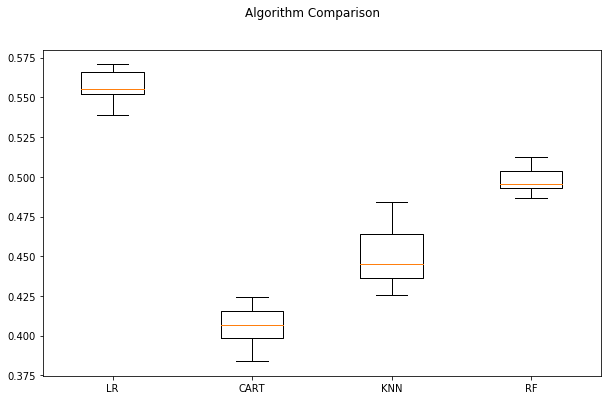

In [1640]:
# Compare Algorithms
fig = plt.figure(figsize=(10,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### make predictions

In [1641]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Make predictions on validation dataset
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.501087429317
[[ 110   12  458    4]
 [  59   15  217    1]
 [ 227   41 1027    3]
 [  24    5   96    0]]
             precision    recall  f1-score   support

    average       0.26      0.19      0.22       584
exceptional       0.21      0.05      0.08       292
       good       0.57      0.79      0.66      1298
   negative       0.00      0.00      0.00       125

avg / total       0.42      0.50      0.44      2299



If I understand correctly, you essentially have two forms of features for your models. (1) Text data that you have represented as a sparse bag of words and (2) more traditional dense features. If that is the case then there are 3 common approaches:

Perform dimensionality reduction (such as LSA via TruncatedSVD) on your sparse data to make it dense and combine the features into a single dense matrix to train your model(s).  

Add your few dense features to your sparse matrix using something like scipy's hstack into a single sparse matrix to train your model(s).  

Create a model using only your sparse text data and then combine its predictions (probabilities if it's classification) as a dense feature with your other dense features to create a model (ie: ensembling via stacking). If you go this route remember to only use CV predictions as features to train your model otherwise you'll likely overfit quite badly (you can make a quite class to do this all within a single Pipeline if desired).